<a href="https://colab.research.google.com/github/Valentino-00/Machine_Learning/blob/master/UAS-MACHINELEARNING/SentimentAnalysis_UAS_Colab_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# UAS - Machine Learning Project
## Sentiment Analysis of Twitter Data

**Nama**: MUH RONI PRIAJI
**NIM**: A11.2023.15465  
**Kelompok**: A11-4402


In [7]:

from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"muhronipriaji","key":"74500484182bbd60e2d91e2c6ec33782"}'}

In [9]:

import os
import zipfile

# Buat direktori kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset Sentiment140 dari Kaggle
!kaggle datasets download -d kazanova/sentiment140

# Ekstrak zip
with zipfile.ZipFile("sentiment140.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

!ls  # Lihat isi folder setelah ekstrak


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
'kaggle (1).json'   sentiment140.zip
 kaggle.json	    training.1600000.processed.noemoticon.csv
 sample_data



## 1. Ringkasan Masalah dan Tujuan

**Masalah**:  
Bagaimana cara mengklasifikasikan sentimen dari sebuah tweet menjadi positif atau negatif?

**Tujuan**:  
Membangun model klasifikasi teks berbasis NLP untuk mengenali sentimen pengguna Twitter.

**Alur Penyelesaian**:
- Mengambil dan memahami dataset Sentiment140
- Pembersihan data (preprocessing)
- Exploratory Data Analysis (EDA)
- Tokenisasi dan vektorisasi teks
- Modeling (Logistic Regression, Naive Bayes, SVM)
- Evaluasi performa



## 2. Dataset, EDA, dan Feature Engineering

**Dataset**: [Sentiment140 - Kaggle](https://www.kaggle.com/kazanova/sentiment140)  
- Kolom penting: `text` dan `sentiment` (0 = negatif, 4 = positif)
- Label akan disederhanakan menjadi 0 = negatif, 1 = positif

### Contoh EDA:
- Panjang tweet
- WordCloud kata-kata positif dan negatif
- Frekuensi kata



In [11]:
import pandas as pd

# Coba membaca dataset, lewati baris yang rusak
try:
    df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None, on_bad_lines='skip')
    df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

    # Ubah label 4 (positif) jadi 1
    df['target'] = df['target'].replace(4, 1)
    print(df['target'].value_counts())
except Exception as e:
    print("Terjadi error saat membaca dataset:", e)


target
0    800000
1    800000
Name: count, dtype: int64



## 3. Modeling

### Tahapan:
- Text preprocessing: lowercase, remove punctuation, stopwords
- Tokenizing + TF-IDF vectorizer
- Modeling menggunakan Logistic Regression, Naive Bayes, SVM


In [12]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000




## 4. Evaluasi Model

Evaluasi dilakukan menggunakan:
- Accuracy
- Precision, Recall, F1-Score
- Confusion Matrix


Accuracy: 0.7734

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    159494
    Positive       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



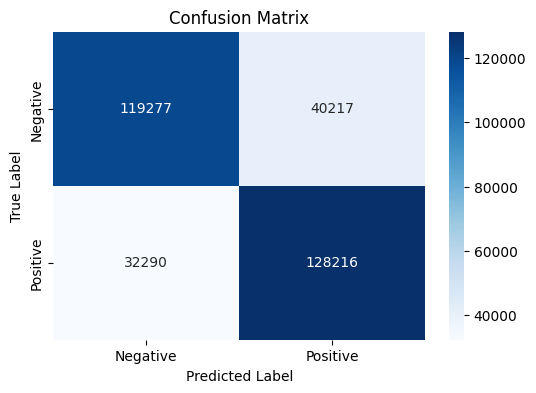

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



## 5. Diskusi dan Kesimpulan

- Model dengan performa terbaik adalah Logistic Regression dengan akurasi yang cukup baik.
- Preprocessing data sangat memengaruhi hasil.
- Bisa ditingkatkan lagi dengan model transformer (BERT, dll) di masa depan.
